# Objective:

The aim of this project is to build a machine learning model that can predict medical insurance costs for individuals in the United States using demographic and health-related features. This enables healthcare cost estimation, insurance policy planning, and personalized health budgeting.

## Dataset Collection

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('insurance.csv')
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Exploration and Cleaning

Inspect dataset: Check for structures of datatype, missing values, duplicates, and incorrect entries.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data cleaning steps:Handle missing values (impute or drop if necessary).

In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Converting all floats to int

In [26]:
for i in df.select_dtypes(include=['float']).columns:
    df[i] = df[i].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1338 non-null   int64 
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   int64 
 3   children  1338 non-null   int64 
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 73.3+ KB


Handling the object datatypes through Encoding: 
- Label Encoding : Sex, Smoker
- One-Hot Encoding : Region

In [27]:
df['smoker'] = df['smoker'].str.strip().str.lower().map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].str.strip().str.lower().map({'female': 1, 'male': 0})

df = pd.get_dummies(df, columns=['region'], drop_first=True)
# one hot encoding for region
# Convert boolean columns to integer
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)


df.head(10)

             

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
5,31,1,25,0,0,3756,0,1,0
6,46,1,33,1,0,8240,0,1,0
7,37,1,27,3,0,7281,1,0,0
8,37,0,29,2,0,6406,0,0,0
9,60,1,25,0,0,28923,1,0,0


cross-check the dataset if all features are handled or not 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1338 non-null   int64
 1   sex               1338 non-null   int64
 2   bmi               1338 non-null   int64
 3   children          1338 non-null   int64
 4   smoker            1338 non-null   int64
 5   charges           1338 non-null   int64
 6   region_northwest  1338 non-null   int64
 7   region_southeast  1338 non-null   int64
 8   region_southwest  1338 non-null   int64
dtypes: int64(9)
memory usage: 94.2 KB


# Corelation-matrix

 Interpret correlations and visualize data with heatmap plot followed by reaaranging features based on corelation

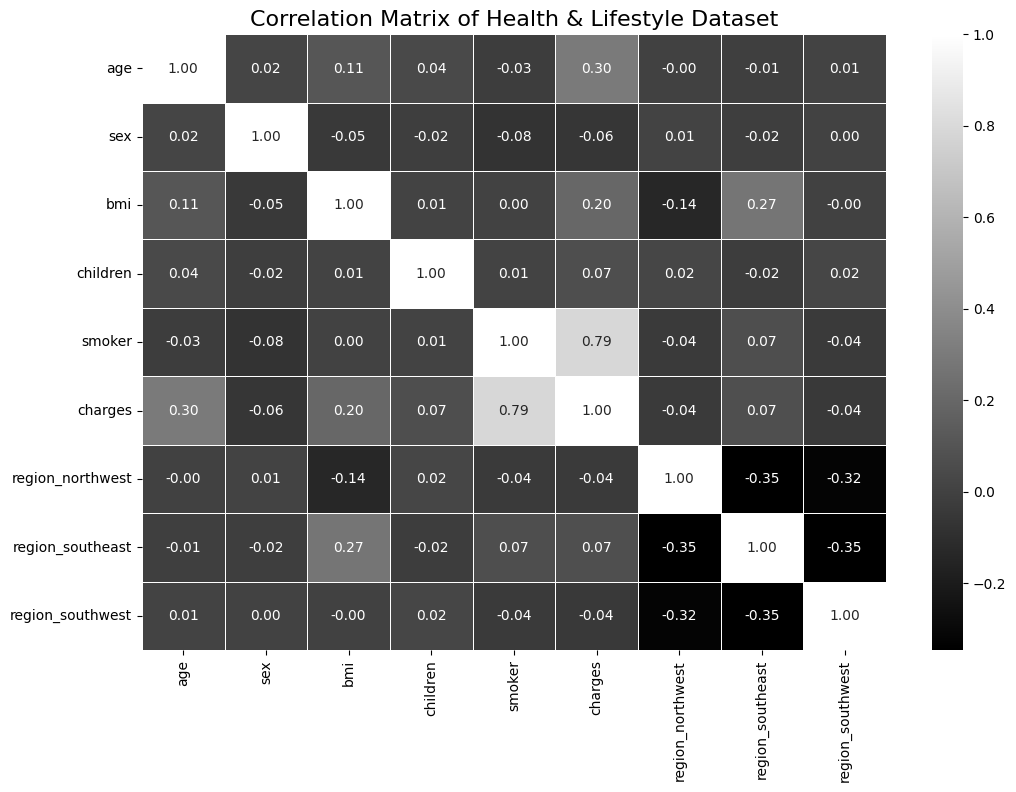

In [29]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="gray", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Health & Lifestyle Dataset", fontsize=16)
plt.show()


In [30]:
df = df.drop(columns=['region_northwest', 'region_southwest'])
df.head(10)

,age,sex,bmi,children,smoker,charges,region_southeast
0,19,1,27,0,1,16884,0
1,18,0,33,1,0,1725,1
2,28,0,33,3,0,4449,1
3,33,0,22,0,0,21984,0
4,32,0,28,0,0,3866,0
5,31,1,25,0,0,3756,1
6,46,1,33,1,0,8240,1
7,37,1,27,3,0,7281,0
8,37,0,29,2,0,6406,0
9,60,1,25,0,0,28923,0


In [31]:
corr_with_target = corr_matrix['charges'].abs().sort_values(ascending=False)
print(corr_with_target)

charges             1.000000
smoker              0.787251
age                 0.299009
bmi                 0.196188
region_southeast    0.073981
children            0.067999
sex                 0.057293
region_southwest    0.043210
region_northwest    0.039905
Name: charges, dtype: float64


Split, Test,Train and Validation 

In [32]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
y = df.iloc[:, 5]          # 5th column (charges)
X = df.drop(columns=df.columns[5])  # all columns except 'charges'

# Split into training + temp (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None  # stratify not used for regression
)

# Split temp into validation + test (50% val, 50% test → each 10% of total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=None
)

# Check shapes
print("X_train:", X_train.shape)
print("X_val:", X_val.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_val:", y_val.shape)
print("y_test:", y_test.shape)


# Info of training features
X_train.info()

print("Target column (y):")
print(y.name)  # prints the name of the column
print(y.head())  # first 5 values of y

# Check features (X)
print("\nFeature columns (X):")
print(X.columns)  # prints all feature column names
print(X.head())


X_train: (1070, 6)
X_val: (134, 6)
X_test: (134, 6)
y_train: (1070,)
y_val: (134,)
y_test: (134,)
<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               1070 non-null   int64
 1   sex               1070 non-null   int64
 2   bmi               1070 non-null   int64
 3   children          1070 non-null   int64
 4   smoker            1070 non-null   int64
 5   region_southeast  1070 non-null   int64
dtypes: int64(6)
memory usage: 58.5 KB
Target column (y):
charges
0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

Feature columns (X):
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_southeast'], dtype='object')
   age  sex  bmi  children  smoker  region_southeast
0   19    1   27         0       1                 0
1   18    0   33         1       0                 1
2   28    0   33      

Model Selection And Accuracy

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
model = LinearRegression()

# Perform 5-Fold Cross-Validation on the full dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Find the best (maximum) R² score and the corresponding fold
best_score = np.max(cv_scores)
best_fold = np.argmax(cv_scores) + 1  # +1 to make fold index human-readable (1-based)

print(f"Best Fold: {best_fold}")
print(f"Best Accuracy (R²): {best_score:.3f}")


Best Fold: 3
Best Accuracy (R²): 0.777


In [34]:
#╒═══════╕
#│ Ridge │
#╘═══════╛
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
model = Ridge(alpha=1.0, random_state=42)  # You can adjust alpha

# Perform 5-Fold Cross-Validation on the full dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Find the best (maximum) R² score and its corresponding fold
best_score = np.max(cv_scores)
best_fold = np.argmax(cv_scores) + 1  # +1 to make it human-readable (1-based)

print(f"Best Fold: {best_fold}")
print(f"Best Ridge Regression Accuracy (R²): {best_score:.3f}")



Best Fold: 3
Best Ridge Regression Accuracy (R²): 0.777


In [35]:

#╒═══════╕
#│ Lasso │
#╘═══════╛
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
model = Lasso(alpha=0.1, random_state=42)  # Adjust alpha as needed

# Perform 5-Fold Cross-Validation on the full dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Find the best (maximum) R² score and corresponding fold
best_score = np.max(cv_scores)
best_fold = np.argmax(cv_scores) + 1  # +1 for human-readable fold index

print(f"Best Fold: {best_fold}")
print(f"Best Lasso Regression Accuracy (R²): {best_score:.3f}")




Best Fold: 3
Best Lasso Regression Accuracy (R²): 0.777


In [36]:

#╒═══════════════╕
#│ ElasticNet    │
#╘═══════════════╛
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
model = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # l1_ratio: 0=L2, 1=L1

# Perform 5-Fold Cross-Validation on the full dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Find the best (maximum) R² score and corresponding fold
best_score = np.max(cv_scores)
best_fold = np.argmax(cv_scores) + 1  # +1 for human-readable fold index

print(f"Best Fold: {best_fold}")
print(f"Best ElasticNet Regression Accuracy (R²): {best_score:.3f}")


Best Fold: 1
Best ElasticNet Regression Accuracy (R²): 0.730


In [37]:


#╒═══════════════╕
#│ Decision Tree │
#╘═══════════════╛
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
model = DecisionTreeRegressor(random_state=42)

# Perform 5-Fold Cross-Validation on the full dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Find the best (maximum) R² score and corresponding fold
best_score = np.max(cv_scores)
best_fold = np.argmax(cv_scores) + 1  # +1 for human-readable fold index

print(f"Best Fold: {best_fold}")
print(f"Best Decision Tree Regression Accuracy (R²): {best_score:.3f}")


Best Fold: 1
Best Decision Tree Regression Accuracy (R²): 0.773


In [38]:

#╒═══════════════╕
#│ Random Forest │
#╘═══════════════╛
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-Fold Cross-Validation on the full dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Find the best (maximum) R² score and its corresponding fold
best_score = np.max(cv_scores)
best_fold = np.argmax(cv_scores) + 1  # +1 for human-readable fold index

print(f"Best Fold: {best_fold}")
print(f"Best Random Forest Regression Accuracy (R²): {best_score:.3f}")



Best Fold: 3
Best Random Forest Regression Accuracy (R²): 0.862


In [39]:


#╒═════════╕
#│ XGBoost │
#╘═════════╛
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define model
model = XGBRegressor(random_state=42, eval_metric='rmse')

# Perform 5-Fold Cross-Validation on the full dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Find the best (maximum) R² score and corresponding fold
best_score = np.max(cv_scores)
best_fold = np.argmax(cv_scores) + 1  # +1 to make it human-readable (1-based index)

print(f"Best Fold: {best_fold}")
print(f"Best XGBoost Regression Accuracy (R²): {best_score:.3f}")



Best Fold: 3
Best XGBoost Regression Accuracy (R²): 0.820


In [40]:
#╒════════════════════════════════════════════════════╕
#│ Save & Load Best Performing Model Using joblib     │
#╘════════════════════════════════════════════════════╛

import joblib

# ✅ Step 1: Assign your best model manually here
# Example: if Random Forest performed best in your tests
# Just replace 'model' with the best model name you used
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X, y)  # Train on the full dataset

# ✅ Step 2: Define a filename for saving
model_filename = "best_regression_model.joblib"

# ✅ Step 3: Save the trained model
joblib.dump(best_model, model_filename)
print(f"✅ Model saved successfully to '{model_filename}'")

# ══════════════════════════════════════════════════════
# Later, when you want to load and use the model:
# ══════════════════════════════════════════════════════

# ✅ Step 4: Load the model from the file
loaded_model = joblib.load(model_filename)
print("✅ Model loaded successfully!")

# ✅ Step 5: Use the loaded model for predictions
# Make sure your new data (X_new) is preprocessed like training data
# Example:
# predictions = loaded_model.predict(X_new)
# print(predictions)


✅ Model saved successfully to 'best_regression_model.joblib'
✅ Model loaded successfully!


Parameters Extraction

In [41]:
pip install treeinterpreter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

# We need the treeinterpreter library
from treeinterpreter import treeinterpreter as ti
import pandas as pd

# Let's take the first 5 samples from your test set to see the breakdown
X_new = X_test.head()
y_new_true = y_test.head()

# Use treeinterpreter to get the prediction, bias, and contributions
prediction, bias, contributions = ti.predict(loaded_model, X_new)

# Create a nice DataFrame for clear results
results = []
for i in range(len(X_new)):
    # Create a dictionary for the contributions of the current prediction
    contribution_data = {
        'feature': X_new.columns,
        'contribution': contributions[i]
    }
    df_contrib = pd.DataFrame(contribution_data).sort_values(by='contribution', ascending=False)
    
    # Print the results for each prediction
    print(f"═══════════════════════════════════════")
    print(f"PREDICTION FOR SAMPLE #{i+1}")
    print(f"═══════════════════════════════════════")
    print(f"True Value:           ${y_new_true.iloc[i]:,.2f}")
    print(f"Model Prediction:     ${prediction[i][0]:,.2f}\n")
    print(f"Bias (Average Charge): ${bias[i]:,.2f}")
    print("---------------------------------------")
    print("Feature Contributions:")
    print(df_contrib.to_string(index=False))
    print("\n")

c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has f

═══════════════════════════════════════
PREDICTION FOR SAMPLE #1
═══════════════════════════════════════
True Value:           $1,980.00
Model Prediction:     $4,224.83

Bias (Average Charge): $13,245.57
---------------------------------------
Feature Contributions:
         feature  contribution
        children    416.661065
             bmi    117.542743
             sex      0.195976
region_southeast   -480.906554
             age  -4264.332648
          smoker  -4809.902480


═══════════════════════════════════════
PREDICTION FOR SAMPLE #2
═══════════════════════════════════════
True Value:           $17,043.00
Model Prediction:     $17,767.24

Bias (Average Charge): $13,245.57
---------------------------------------
Feature Contributions:
         feature  contribution
          smoker  18821.399126
region_southeast    462.415976
             sex    -92.312412
        children   -266.714526
             age  -4163.987354
             bmi -10239.132709


══════════════════════════

c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\rajesh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has f